<a href="https://colab.research.google.com/github/2303A52261/Explainable-AI/blob/main/EAI_ASS1_2261.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Create the dataset
data = {
    'Push_Notifications_Sent': [1, 2, 3, 1, 2],
    'Workout_Sessions': [25, 35, 42, 28, 38]
}

df = pd.DataFrame(data)

In [2]:
from sklearn.linear_model import LinearRegression

X = df[['Push_Notifications_Sent']]  # independent variable
y = df['Workout_Sessions']           # dependent variable

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression Equation: y = {intercept:.2f} + {slope:.2f} * x")

Regression Equation: y = 19.07 + 8.07 * x


In [3]:
baseline = y.mean()
print(f"Baseline (mean of y): {baseline:.2f}")

Baseline (mean of y): 33.60


In [4]:
# Predict workout sessions
df['Predicted'] = model.predict(X)

# SHAP Value = Predicted - Baseline
df['SHAP_Value'] = df['Predicted'] - baseline

# Confirm: Prediction = Baseline + SHAP
df['Reconstructed'] = baseline + df['SHAP_Value']

df

,Push_Notifications_Sent,Workout_Sessions,Predicted,SHAP_Value,Reconstructed
0,1,25,27.142857,-6.457143,27.142857
1,2,35,35.214286,1.614286,35.214286
2,3,42,43.285714,9.685714,43.285714
3,1,28,27.142857,-6.457143,27.142857
4,2,38,35.214286,1.614286,35.214286


In [5]:
df['Actual'] = y
df['Error'] = df['Predicted'] - df['Actual']
df['Prediction_Type'] = df['Error'].apply(lambda e: 'Overprediction' if e > 0 else 'Underprediction' if e < 0 else 'Exact')

df


,Push_Notifications_Sent,Workout_Sessions,Predicted,SHAP_Value,Reconstructed,Actual,Error,Prediction_Type
0,1,25,27.142857,-6.457143,27.142857,25,2.142857,Overprediction
1,2,35,35.214286,1.614286,35.214286,35,0.214286,Overprediction
2,3,42,43.285714,9.685714,43.285714,42,1.285714,Overprediction
3,1,28,27.142857,-6.457143,27.142857,28,-0.857143,Underprediction
4,2,38,35.214286,1.614286,35.214286,38,-2.785714,Underprediction


In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
data = pd.DataFrame({
    "Gym_Collabs": [2, 1, 3, 0, 2],
    "Influencer_Posts": [5, 3, 4, 2, 1],
    "Awareness_Score": [70, 55, 80, 40, 50]
})

X = data[["Gym_Collabs", "Influencer_Posts"]]
y = data["Awareness_Score"]
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coeffs = model.coef_

print("Regression Equation: Awareness_Score = {:.2f} + {:.2f}*(Gym_Collabs) + {:.2f}*(Influencer_Posts)".format(
    intercept, coeffs[0], coeffs[1]
))
baseline = y.mean()
print("\nBaseline (mean of Awareness Scores): {:.2f}".format(baseline))
# SHAP value for each feature = (feature_value - feature_mean) * coefficient
feature_means = X.mean()

shap_gym = (X["Gym_Collabs"] - feature_means["Gym_Collabs"]) * coeffs[0]
shap_influencer = (X["Influencer_Posts"] - feature_means["Influencer_Posts"]) * coeffs[1]
predictions_eq = model.predict(X)
predictions_shap = baseline + shap_gym + shap_influencer
print("\nVerification (Prediction from Equation vs Baseline+SHAP):")
for i in range(len(X)):
    print(f"Record {i+1}: Eq={predictions_eq[i]:.2f}, SHAP={predictions_shap[i]:.2f}")
print("\nInterpretations:")
for i in range(len(X)):
    actual = y.iloc[i]
    pred = predictions_eq[i]
    diff = pred - actual

    print(f"\nRecord {i+1}:")
    print(f"  Actual Awareness Score: {actual}")
    print(f"  Predicted Awareness Score: {pred:.2f}")
    print(f"    SHAP(Gym Collabs) contribution: {shap_gym.iloc[i]:.2f}")
    print(f"    SHAP(Influencer Posts) contribution: {shap_influencer.iloc[i]:.2f}")
    print(f"    Baseline: {baseline:.2f}")
    if diff > 0:
        print(f"  → Model overpredicted by {diff:.2f} points.")
    elif diff < 0:
        print(f"  → Model underpredicted by {-diff:.2f} points.")
    else:
        print("  → Model prediction was exact.")

Regression Equation: Awareness_Score = 28.65 + 9.07*(Gym_Collabs) + 5.28*(Influencer_Posts)

Baseline (mean of Awareness Scores): 59.00

Verification (Prediction from Equation vs Baseline+SHAP):
Record 1: Eq=73.19, SHAP=73.19
Record 2: Eq=53.56, SHAP=53.56
Record 3: Eq=76.98, SHAP=76.98
Record 4: Eq=39.21, SHAP=39.21
Record 5: Eq=52.07, SHAP=52.07

Interpretations:

Record 1:
  Actual Awareness Score: 70
  Predicted Awareness Score: 73.19
    SHAP(Gym Collabs) contribution: 3.63
    SHAP(Influencer Posts) contribution: 10.56
    Baseline: 59.00
  → Model overpredicted by 3.19 points.

Record 2:
  Actual Awareness Score: 55
  Predicted Awareness Score: 53.56
    SHAP(Gym Collabs) contribution: -5.44
    SHAP(Influencer Posts) contribution: 0.00
    Baseline: 59.00
  → Model underpredicted by 1.44 points.

Record 3:
  Actual Awareness Score: 80
  Predicted Awareness Score: 76.98
    SHAP(Gym Collabs) contribution: 12.70
    SHAP(Influencer Posts) contribution: 5.28
    Baseline: 59.00
  

Baseline (mean target on train): 153.737
Sample 0
  Model prediction:      139.548
  Baseline + SHAP sum:   143.335
  Difference (error):    -3.787e+00

--- Record 0 ---
Predicted = 139.548, Actual = 219.000
Feature contributions (SHAP values):
s2     64.587169
s5     23.691276
sex    10.379010
s4      9.387414
s3      3.561787
dtype: float64
s1    -116.415425
bp      -3.683095
bmi     -3.361659
s6      -0.510046
age      1.962051
dtype: float64
→ Model underpredicted.

--- Record 1 ---
Predicted = 179.517, Actual = 70.000
Feature contributions (SHAP values):
s1     23.288212
bmi    20.023792
sex    10.379010
bp      9.484923
age     3.751993
dtype: float64
s5   -16.762007
s4   -10.931664
s2    -8.903205
s6    -1.316442
s3     0.553521
dtype: float64
→ Model overpredicted.

--- Record 2 ---
Predicted = 134.039, Actual = 202.000
Feature contributions (SHAP values):
s5     62.017204
s2     25.002950
s3      9.578319
age     2.650490
s4     -0.772125
dtype: float64
s1    -95.908469
sex   

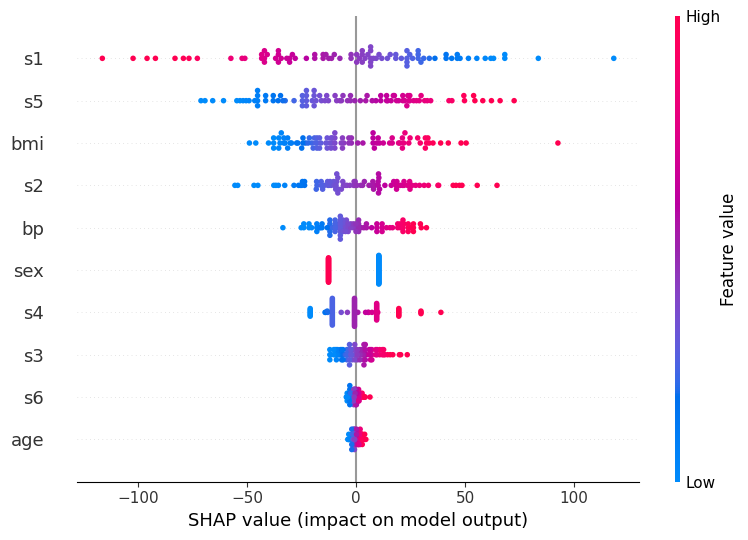

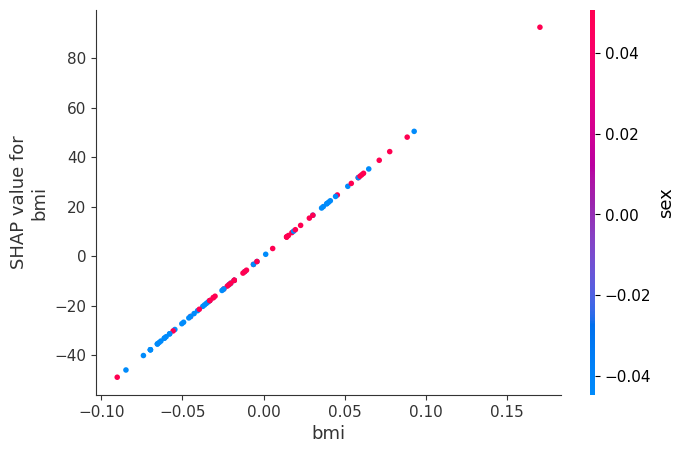

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap

# 1. Load data
X, y = load_diabetes(return_X_y=True, as_frame=True)

# 2. Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Fit multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Baseline value (mean of training target)
baseline = y_train.mean()
print(f"Baseline (mean target on train): {baseline:.3f}")

# 5. Compute SHAP values using linear model explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 6. Validate prediction decomposition for the first test sample
i = 0
pred = model.predict(X_test.iloc[[i]])[0]
shap_sum = shap_values.values[i].sum()
reconstructed = baseline + shap_sum
print("Sample", i)
print(f"  Model prediction:      {pred:.3f}")
print(f"  Baseline + SHAP sum:   {reconstructed:.3f}")
print(f"  Difference (error):    {pred - reconstructed:.3e}")

# 7. Interpret each test record
for idx in range(len(X_test)):
    pred_val = model.predict(X_test.iloc[[idx]])[0]
    actual_val = y_test.iloc[idx]
    shap_contribs = pd.Series(shap_values.values[idx], index=X_test.columns)

    print(f"\n--- Record {idx} ---")
    print(f"Predicted = {pred_val:.3f}, Actual = {actual_val:.3f}")
    print("Feature contributions (SHAP values):")
    print(shap_contribs.sort_values(ascending=False).head(5))
    print(shap_contribs.sort_values().head(5))
    if pred_val > actual_val:
        print("→ Model overpredicted.")
    elif pred_val < actual_val:
        print("→ Model underpredicted.")
    else:
        print("→ Perfect prediction.")

# Optional: visualize global summary
shap.summary_plot(shap_values.values, X_test)

# Optional: dependence plot for a specific feature, e.g., 'bmi'
shap.dependence_plot("bmi", shap_values.values, X_test)
